In [1]:
from test import build_model
import argparse
import yaml
import torch
import model

import torch
import torchvision
from torchviz import make_dot
from torchview import draw_graph

/home/sasank/miniconda3/envs/SrGAN/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/sasank/miniconda3/envs/SrGAN/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [6]:
parser = argparse.ArgumentParser()
# parser.add_argument("--config_path",
#                     type=str,
#                     default="./configs/test/SRGAN_x4-SRGAN_ImageNet-Set5.yaml",
#                     required=True,
#                     help="Path to test config file.")
# args = parser.parse_args()

with open("./configs/test/SRGAN_x4-SRGAN_ImageNet-Set5.yaml", "r") as f:
    config = yaml.full_load(f)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
g_model = build_model(config, device)

In [7]:
print(g_model)

SRResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (trunk): Sequential(
    (0): _ResidualConvBlock(
      (rcb): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): _ResidualConvBlock(
      (rcb): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=F

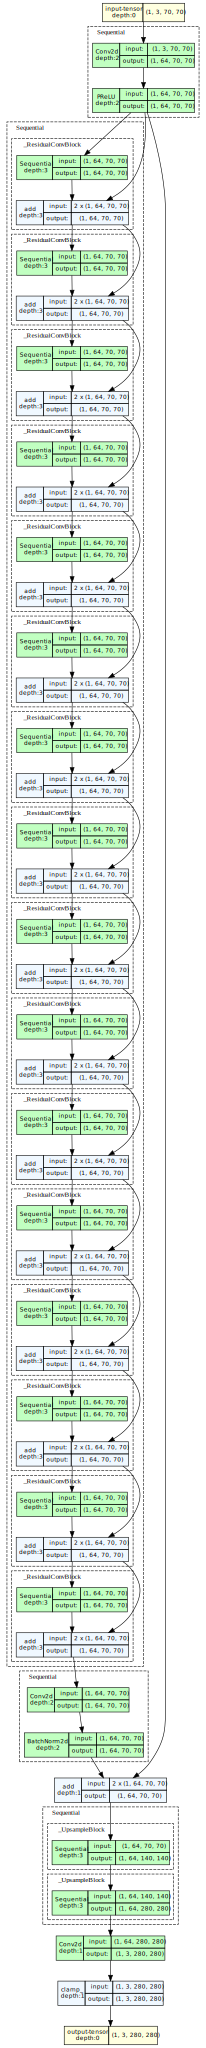

In [16]:
model_graph = draw_graph(model.__dict__[config["MODEL"]["G"]["NAME"]](in_channels=config["MODEL"]["G"]["IN_CHANNELS"],
                                                           out_channels=config["MODEL"]["G"]["OUT_CHANNELS"],
                                                           channels=config["MODEL"]["G"]["CHANNELS"],
                                                           num_rcb=config["MODEL"]["G"]["NUM_RCB"]), input_size=(1,3,70,70), expand_nested=True)
model_graph.visual_graph

In [ ]:
x = torch.randn(1, 3, 70, 70)
y = g_model(x)
make_dot(y, params=dict(g_model.named_parameters()))

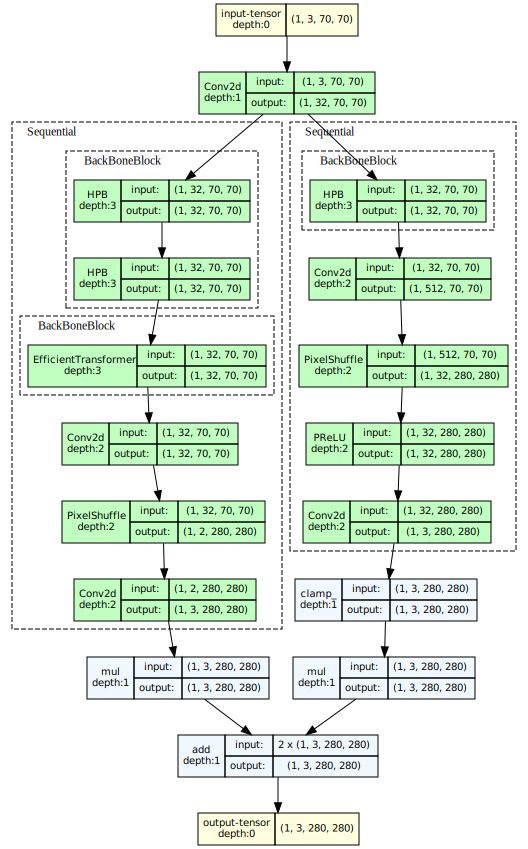

In [2]:
from models.models import ETGAN
model_graph = draw_graph(ETGAN(mlpDim=128,scaleFactor=4), input_size=(1,3,70,70), expand_nested=True)
model_graph.visual_graph